In [9]:
# Import necessary libraries
from google.colab import drive
import pandas as pd # Data management
import matplotlib.pyplot as plt # Plotting library
from sklearn.model_selection import train_test_split # Split data
from sklearn.preprocessing import StandardScaler # Standardize features
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Regression models
from sklearn.metrics import mean_squared_error # Calculate MSE

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/MyDrive/employee_salary_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:

#Data Preparation
df = pd.read_csv(file_path) # READ THE DATA into a pandas Data

X = df[['YearsExperience','Age','WorkingHoursPerWeek']] # Select features
y = df['Salary'] # Select target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split train/test

scaler = StandardScaler() # Initialize scaler
X_train = scaler.fit_transform(X_train) # Fit and transform
X_test  = scaler.transform(X_test) # Transform test


In [11]:

#Model Training & MSE
alphas = [0.01,0.1,1,10] # Alpha values

# Linear
lr = LinearRegression() # Init Linear
lr.fit(X_train, y_train) # Train model
train_mse = [mean_squared_error(y_train, lr.predict(X_train))] # Train MSE
test_mse  = [mean_squared_error(y_test,  lr.predict(X_test))] # Test MSE
labels = ['Linear'] # Store label
coefs = [lr.coef_] # Store coefficients

# Ridge
for a in alphas: # Loop alphas
    ridge = Ridge(alpha=a) # Init Ridge
    ridge.fit(X_train, y_train) # Train Ridge
    train_mse.append(mean_squared_error(y_train, ridge.predict(X_train))) # Append train
    test_mse.append(mean_squared_error(y_test, ridge.predict(X_test))) # Append test
    labels.append(f'Ridge {a}') # Append label
    coefs.append(ridge.coef_) # Append coefficients

# Lasso
for a in alphas: # Loop alphas
    lasso = Lasso(alpha=a, max_iter=10000) # Init Lasso
    lasso.fit(X_train, y_train) # Train Lasso
    train_mse.append(mean_squared_error(y_train, lasso.predict(X_train))) # Append train
    test_mse.append(mean_squared_error(y_test, lasso.predict(X_test))) # Append test
    labels.append(f'Lasso {a}') # Append label
    coefs.append(lasso.coef_) # Append coefficients



In [12]:
#Print results
for l, tr, te, c in zip(labels, train_mse, test_mse, coefs): # Loop results
    print(f"{l}: Train MSE={tr:.2f}, Test MSE={te:.2f}, Coefficients={c}") # Print results


Linear: Train MSE=464798.36, Test MSE=7413164.00, Coefficients=[  192.34211715 13095.30866374   192.34211715]
Ridge 0.01: Train MSE=487284.68, Test MSE=7238028.64, Coefficients=[  922.82057485 11625.36531909   922.82057485]
Ridge 0.1: Train MSE=818458.99, Test MSE=6763175.72, Coefficients=[3062.29200725 7281.3326371  3062.29200725]
Ridge 1: Train MSE=1542830.20, Test MSE=6834915.93, Coefficients=[4086.82773424 4678.59824044 4086.82773424]
Ridge 10: Train MSE=20111861.91, Test MSE=24973843.56, Coefficients=[3019.14467847 3076.37489236 3019.14467847]
Lasso 0.01: Train MSE=464798.41, Test MSE=7412888.73, Coefficients=[ 13395.12984233  13093.0361013  -13008.17490066]
Lasso 0.1: Train MSE=464803.62, Test MSE=7410444.23, Coefficients=[ 13289.97984233  13072.84758105 -12882.85169595]
Lasso 1: Train MSE=464799.36, Test MSE=7413009.81, Coefficients=[  384.18292674 13094.80735617     0.        ]
Lasso 10: Train MSE=464899.24, Test MSE=7410007.03, Coefficients=[  393.88389026 13076.15699875     0

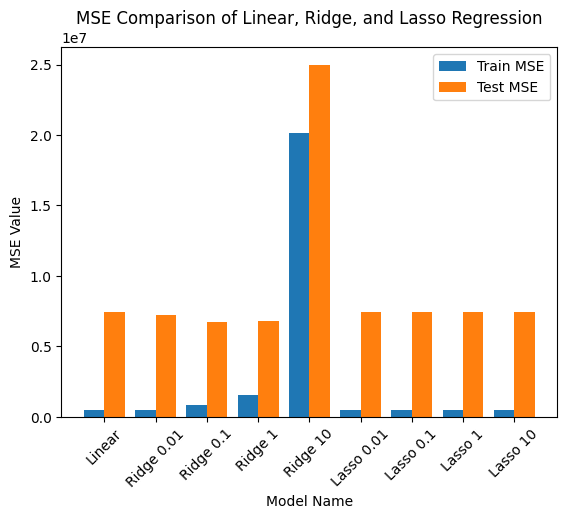

Ridge and Lasso reduce overfitting 
Choice of alpha affects performance


In [13]:

# Visualization
x = range(len(labels)) # X-axis positions
plt.bar([i-0.2 for i in x], train_mse, width=0.4, label='Train MSE') # Plot train
plt.bar([i+0.2 for i in x], test_mse, width=0.4, label='Test MSE') # Plot test
plt.xticks(x, labels, rotation=45) # Set X-ticks
plt.ylabel('MSE Value') # Y-axis label
plt.xlabel('Model Name') # X-axis label
plt.title('MSE Comparison of Linear, Ridge, and Lasso Regression') # Set title
plt.legend() # Show legend
plt.show() # Display plot

Conclusion:
Linear Regression works well on training data but not on test data, so it overfits. Ridge and Lasso make the model more balanced. When alpha is too big, the model becomes weak. We must choose alpha carefully.